# 图论

## 模型

略

## 实现

选择了库 `igraph`

### 建图

In [182]:
import igraph as ig

#! 修改建图
g = ig.Graph(
    # 点个数
    n = 4,
    # 有向图/无向图
    directed = True,
    # 建边
    # [from, to]
    edges = [
        [0, 1],
        [0, 3],
        [1, 3],
        [3, 2],
    ],
    # 点属性
    vertex_attrs = {
        "name": ["haha", "dodo", "lolo", "veve"],
        "vertice_attr1": [1, 2, 3, 5],
        "vertice_attr2": ["abc", "def", "ghi", "jkl"],
    },
    # 边属性
    edge_attrs = {
        "edge_attr": [True, False, True, False],
        "w1": [2, 4, 5, 1],
    },
)

print(g)

IGRAPH DN-- 4 4 --
+ attr: name (v), vertice_attr1 (v), vertice_attr2 (v), edge_attr (e), w1 (e)
+ edges (vertex names):
haha->dodo, haha->veve, dodo->veve, veve->lolo


### 绘图

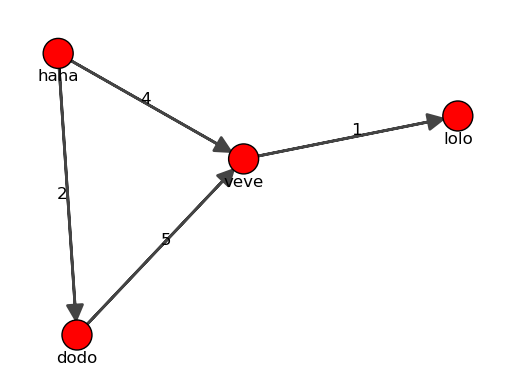

In [183]:
import matplotlib.pyplot as plt

#! 修改图样式
# LNK: https://python.igraph.org/en/stable/tutorial.html#vertex-attributes-controlling-graph-plots
# LNK: https://python.igraph.org/en/stable/tutorial.html#edge-attributes-controlling-graph-plots
visual_style = {
    "vertex_label": g.vs["name"],
    "vertex_label_dist": 1.1,
    "edge_align_label": False,
    "edge_curved": False,
    "edge_label": g.es["w1"]
}

fig, ax = plt.subplots()
ig.plot(g, 
    layout = g.layout_auto(),
    target = ax,
    **visual_style,
)

### 最短路

In [184]:
g.distances(
    # from
    source=[0, 1], 
    # to
    target=[2, 3], 
    # 参考权重
    weights=g.es["w1"]
)

[[5.0, 4.0], [6.0, 5.0]]

### 最小生成树

In [185]:
# 构成最小生成树的边
mst_edges = g.spanning_tree(weights=g.es["w1"], return_tree=False)
print("最小生成树的权重和: ", sum(g.es[mst_edges]["w1"]))

最小生成树的权重和:  7
